In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나이상 설정할 경우
from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수 - 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 평가함수 - 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀용
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 군집 알고리즘
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 시간 측정을 위한모듈
import datetime
# 저장을 위한 모듈
import pickle

### 데이터를 읽어온다.

In [2]:
train_df = pd.read_csv('./data/train.csv')
train_df.sample()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7763,8287_01,Mars,False,E/542/S,TRAPPIST-1e,21.0,False,1242.0,0.0,654.0,0.0,0.0,Toat Nanie,False


In [3]:
test_df = pd.read_csv('./data/test.csv')
test_df.sample()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
2826,6247_01,Mars,False,F/1288/P,TRAPPIST-1e,13.0,False,911.0,3.0,620.0,161.0,0.0,Tostex Emone


- PassengerId : 승객 ID, gggg_pp 양식, gggg는 여행을 같이하는 그룹의 번호, pp는 그룹내에서 승객의 번호가 된다.
- HomePlanet : 출발 행성.
- CryoSleep : 동면 여부.
- Cabin : 객실, deck/num/side 양식
- Destination : 목적지 행성.
- Age : 나이
- VIP : VIP 여부
- RoomService : 룸서비스를 이용한 총액
- FoodCourt : 푸드코트를 이용한 총액
- SoppingMall : 쇼핑몰을 이용한 총액
- Spa : 스파를 이용한 총액
- VRDeck : VRDeck을 이용한 총액
- Name : 승객의 이름
- Transported : 도착 여부

### 데이터 프레임 정보 확인

In [4]:
# 결측치 확인
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
# 결측치 확인
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### 데이터 전처리

In [6]:
# 이 데이터는 원래 하나의 데이터이다. 이에 하나로 합쳐서 전처리를 수행한다.
data = pd.concat([train_df, test_df])
# 인덱스를 초기화한다.
data.reset_index(drop=True, inplace=True)
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [7]:
# 결측치 확인
data.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

### PassengerId
- gggg_pp 양식으로 되어있다.
- gggg 부분은 같이 여행하는 사람들 그룹
- pp 부분은 그룹 내에서의 번호

In [8]:
# 결측치 확인
data['PassengerId'].isnull().sum()

0

In [9]:
# 그룹번호를 구한다.
a1 = data['PassengerId'].str.split('_')
temp = []
# 그룹 번호만 담는다.
for a2, a3 in a1 : 
    temp.append(a2)

# 데이터 프레임에 붙혀준다.
data['Group'] = temp
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,9266
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,9269
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,9271
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,9273


In [10]:
data['PassengerId'].str.split('_').str[0].values

array(['0001', '0002', '0003', ..., '9271', '9273', '9277'], dtype=object)

In [11]:
data['Group2'] = data['PassengerId'].str.split('_').str[0].values

In [12]:
del data['Group2']

In [13]:
# 총 그룹의 개수
len(data['Group'].unique())

9280

In [14]:
# 그룹별로 묶어서 각 그룹의 승객수를 확인한다.
# data.groupby('Group')['PassengerId'].count()
# 갯수를 세기 위함으로 결측치가 없는 컬럼 아무거나 선택
a1 = data[['Group', 'PassengerId']].groupby('Group').count()
a1.columns = ['승객수']
a1

,승객수
Group,
0001,1
0002,1
0003,2
0004,1
0005,1
...,...
9276,1
9277,1
9278,1


In [15]:
# 그룹내에 승객이 한명인 승객만 추출하여 도착여부를 확인해본다.
a2 = a1.reset_index()

a3 = a2.query('승객수 == 1')
a3

,Group,승객수
0,0001,1
1,0002,1
3,0004,1
4,0005,1
6,0007,1
...,...,...
9273,9274,1
9275,9276,1
9276,9277,1
9277,9278,1


In [16]:
# 승객이 1명인 그룹의 데이터를 모두 가져온다.
# 그룹 번호를 가져온다.
a4 = a3['Group'].values
a5 = data.query('Group in @a4')
a5

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0005
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12963,9265_01,Mars,False,D/278/S,TRAPPIST-1e,43.0,False,47.0,0.0,3851.0,0.0,0.0,Toate Cure,NaN,9265
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,9269
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,9271
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,9273


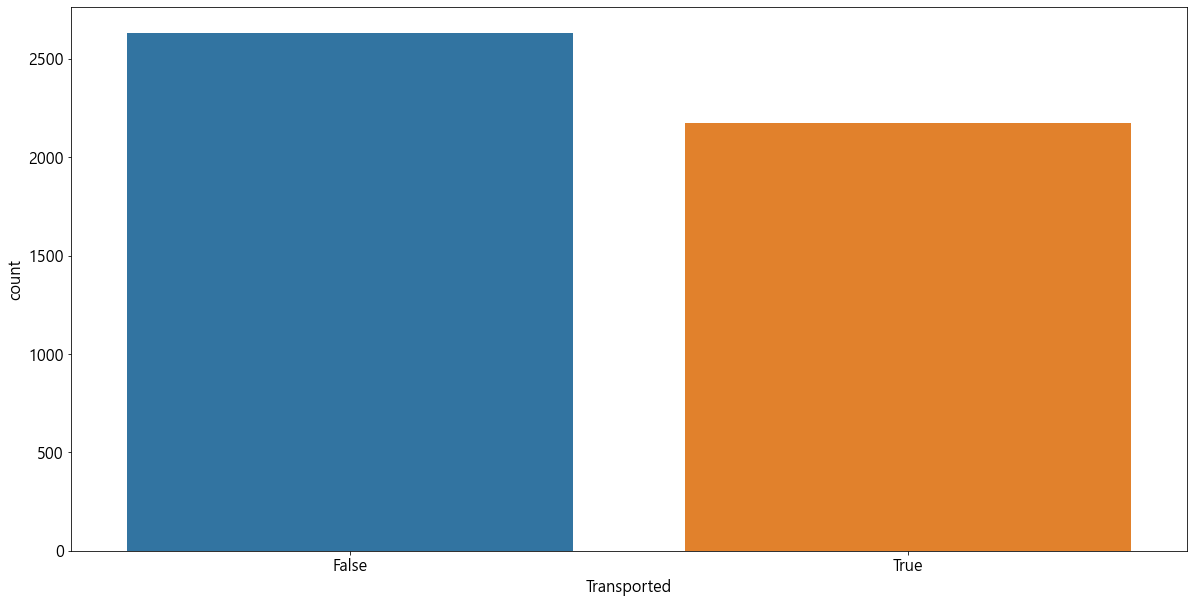

In [17]:
sns.countplot(data = a5, x='Transported')
plt.show()

In [18]:
# 2명이상인 사름들의 데이터를 확인한다.
a10 = a2.query('승객수 > 1')
a10

,Group,승객수
2,0003,2
5,0006,2
7,0008,3
16,0017,2
19,0020,6
...,...,...
9265,9266,2
9266,9267,2
9271,9272,2
9274,9275,3


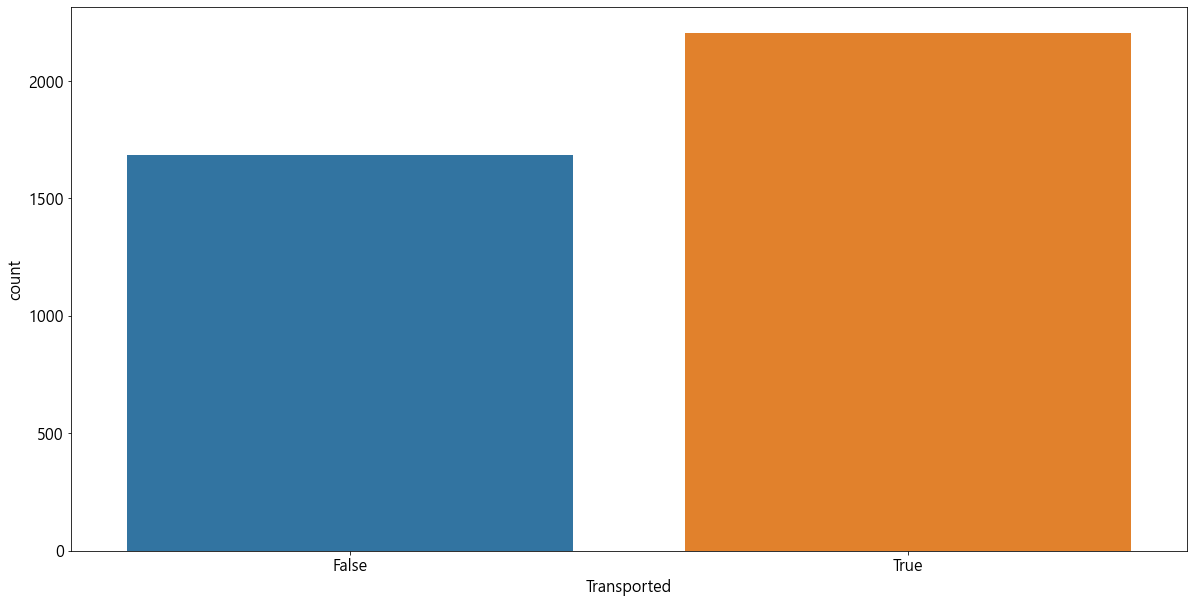

In [19]:
# 해당 그룹에 해당하는 모든 사람들을 가져온다.
# 그룹 번호를 가져온다.
a20 = a10['Group'].values
a30 = data.query('Group in @a20')
sns.countplot(data=a30 , x='Transported')
plt.show()

In [20]:
# 승객수 별 그룹의 개수
a3 = a2.groupby('승객수').count()
a4 = a3.reset_index()
a4

,승객수,Group
0,1,7145
1,2,1295
2,3,502
3,4,154
4,5,76
5,6,42
6,7,47
7,8,19


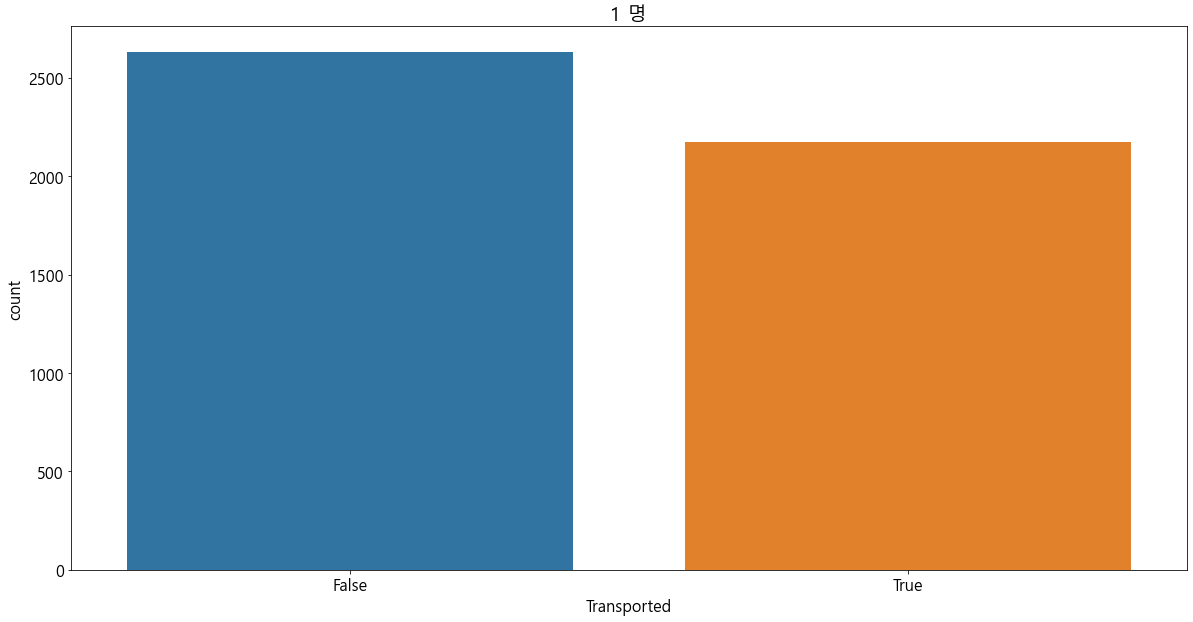

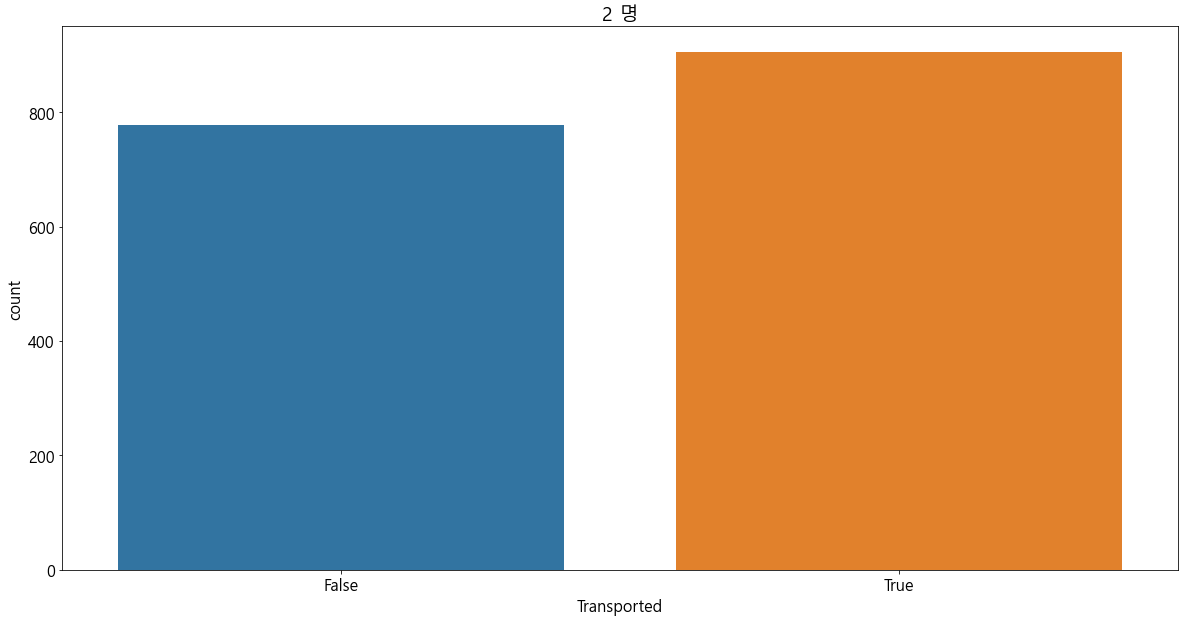

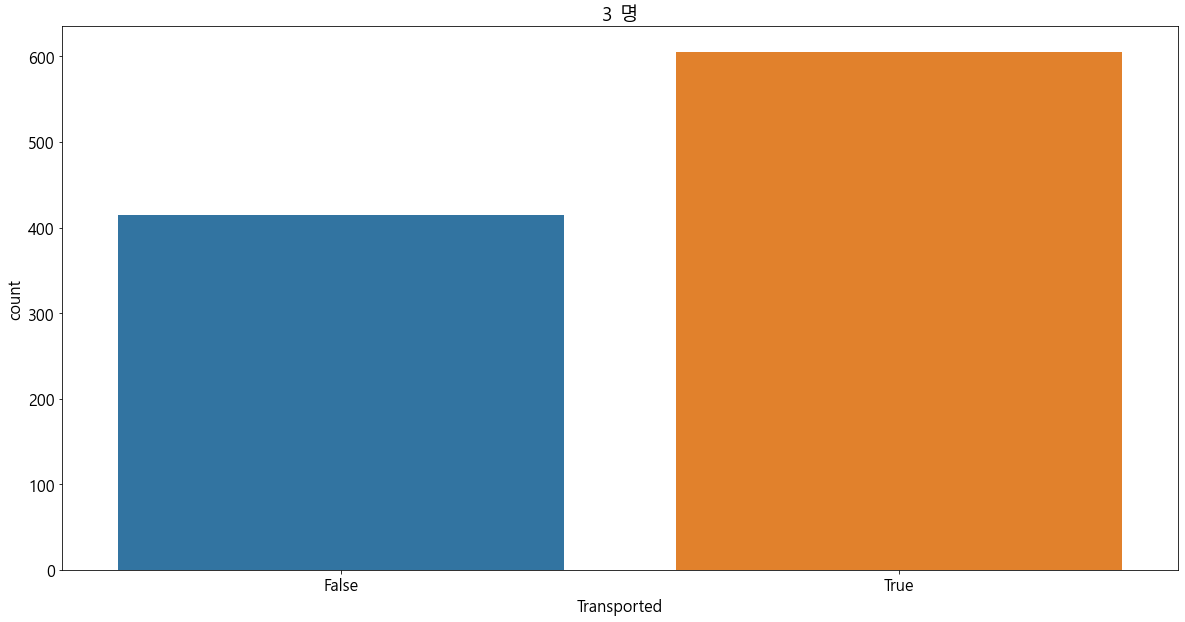

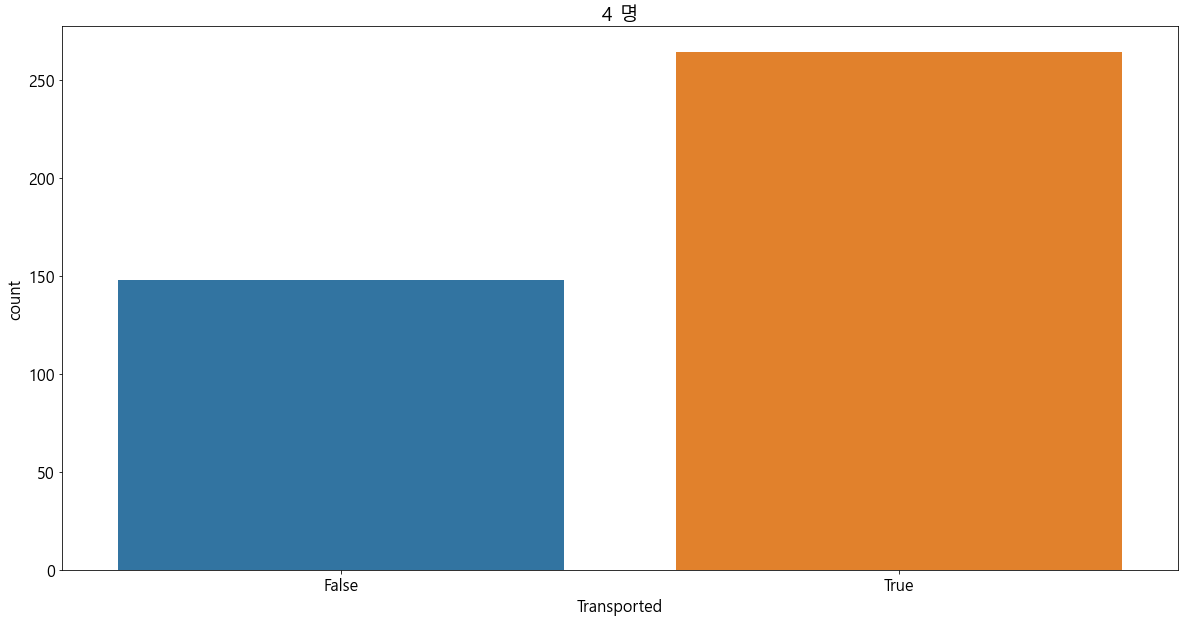

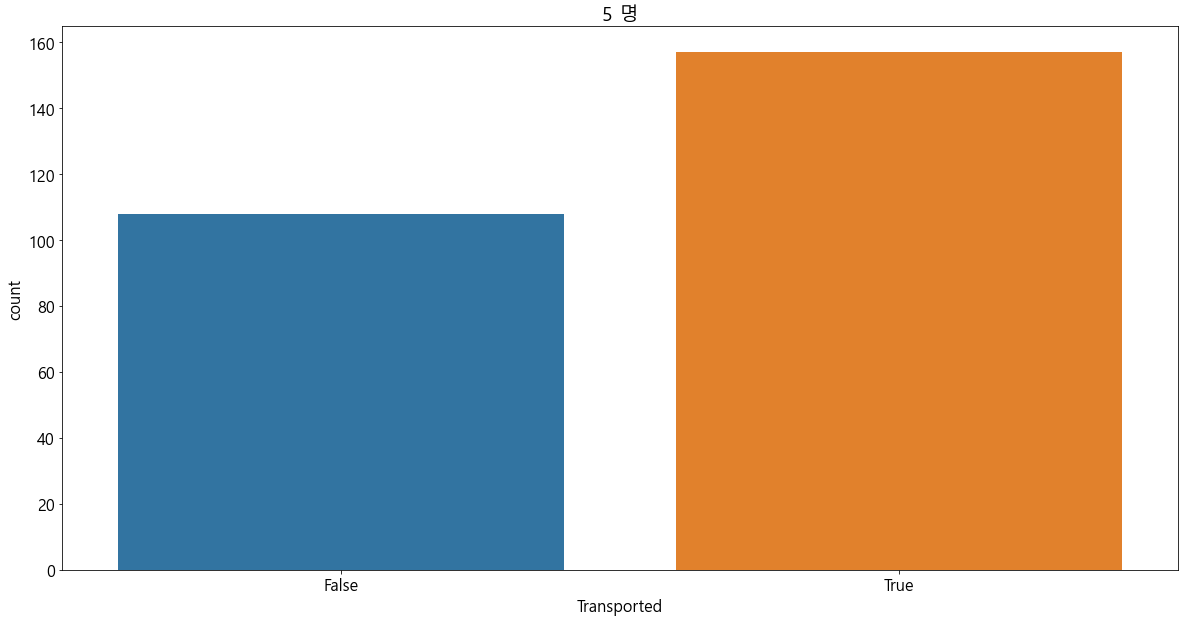

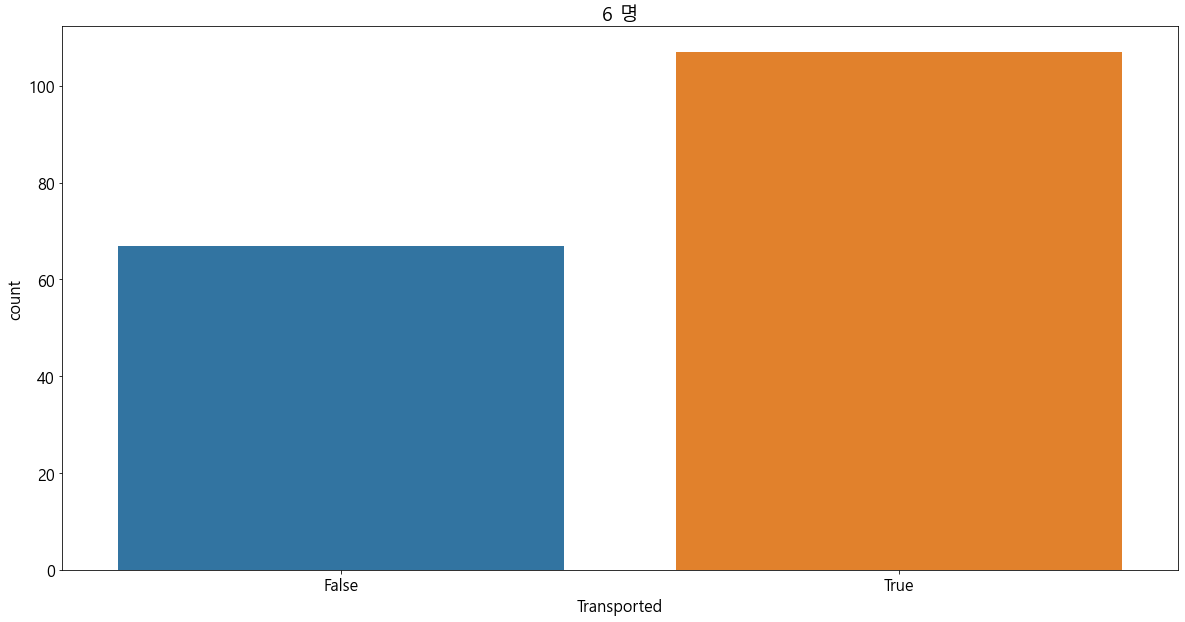

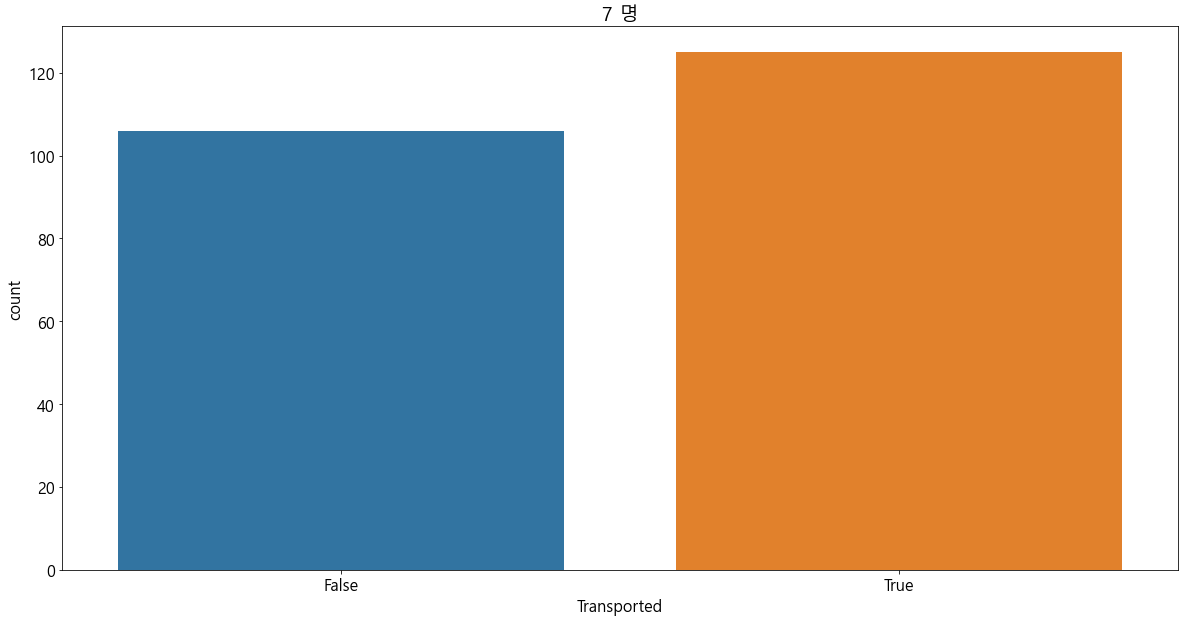

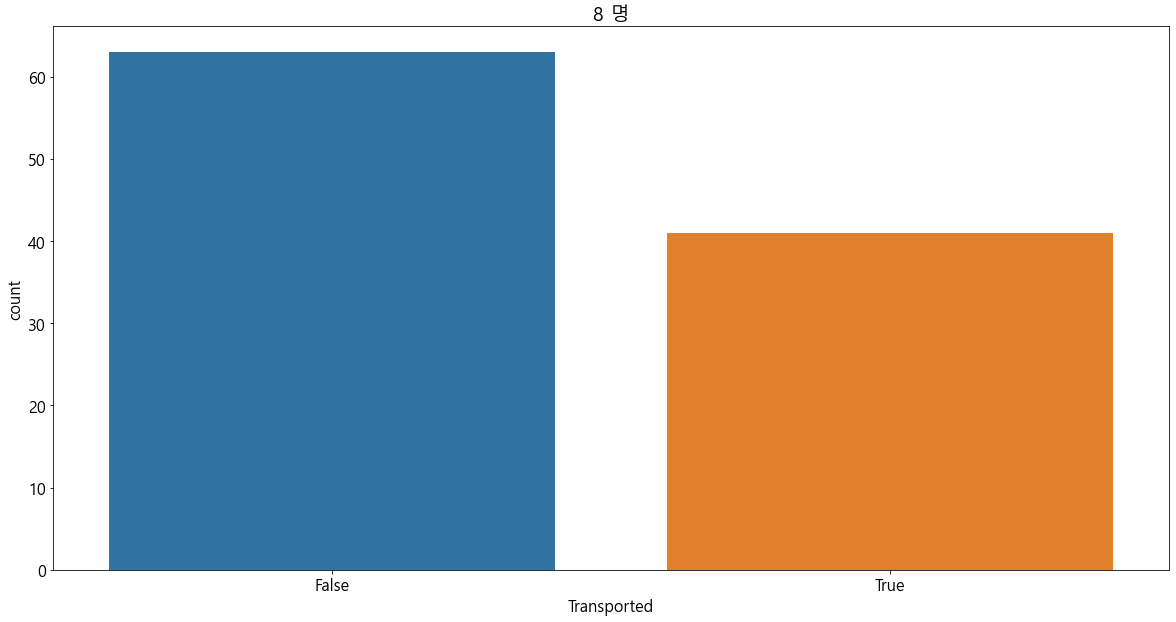

In [21]:
# 승객수를 가지고 반복분을 돌린다.
for a100 in a4['승객수'] :
    a10 = a2.query('승객수 == @a100')['Group'].values
    
    a20 = data.query('Group in @a10')
    
    sns.countplot(data=a20, x='Transported')
    plt.title(f'{a100} 명')
    plt.show()

In [22]:
# 같은 그룹의 사람이 1, 8명인 경우 도착하지 못할 확률이 높고,
# 같은 그룹의 사람이 1, 8명이 아닌 경우 도착할 확률이 높았다.
# 같은 그룹에 몇 명이 있는지에 대한 데이터를 구해 컬럼에 붙혀준다.

# 데이터 프레임에 GroupNum 이라는 컬럼을 붙혀주고 0으로 설정한다.
data['GroupNum'] = 0

# a2에서 Group 번호와 승객수를 가져온다.
for a10, a20 in a2.values : 
    # 가져온 그룹번호에 해당하는 행의 index를 가져온다.
    a30 = data.query('Group == @a10').index
    # 해당 인덱스를 통해 GroupNum에 같은 그룹의 승객수 값을 넣어준다.
    data.loc[a30, 'GroupNum'] = a20

data    

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupNum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,9266,2
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,9269,1
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,9271,1
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,9273,1


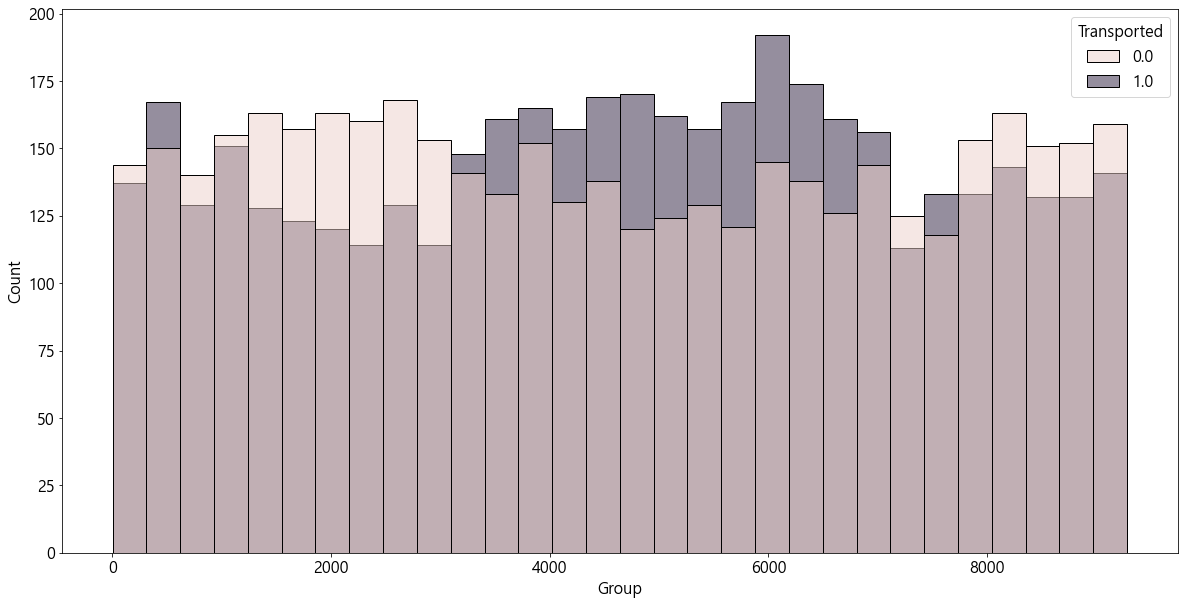

In [23]:
data2 = data.copy()
data2['Group'] = data2['Group'].astype('int64')
sns.histplot(data=data2, x='Group', hue='Transported', bins=30)
plt.show()

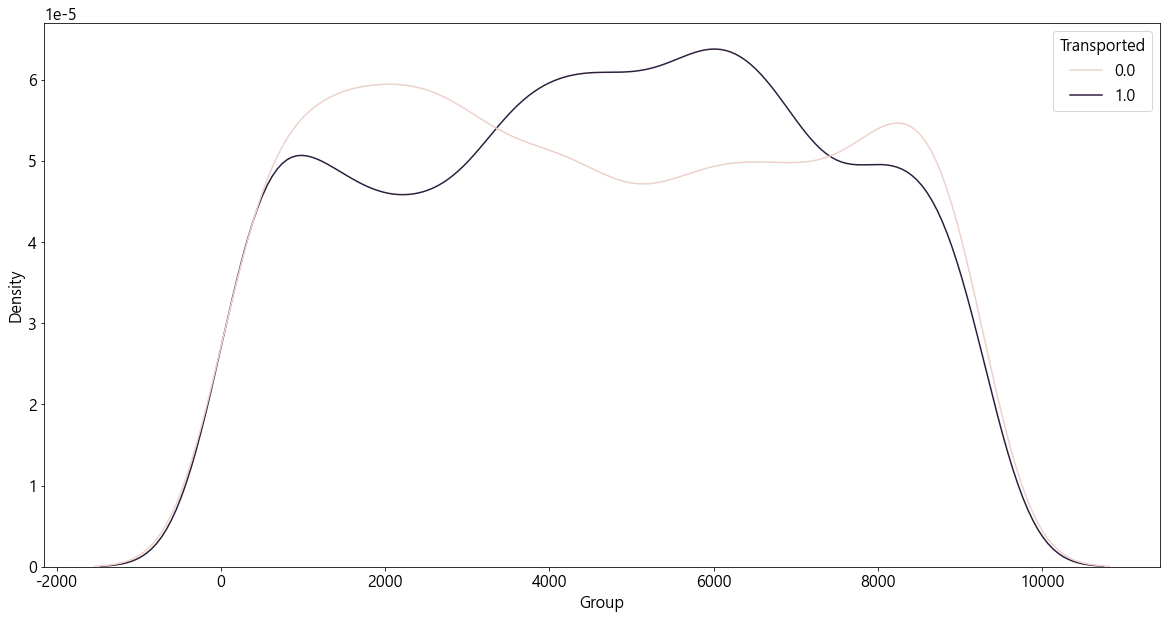

In [24]:
data2 = data.copy()
data2['Group'] = data2['Group'].astype('int64')
sns.kdeplot(data=data2, x='Group', hue='Transported')
plt.show()

- 같은 그룹의 속한 사람의 수가 1, 8명인 경우 도착하지 못할 확률이 높았고 그 외에는 도착확률이 높았다.
- 그룹의 번호가 작거나 크면 도착하지 못할 확률이 높았고 중간 정도이면 도착할 확률이 높았습니다.


In [25]:
# 파생 변수를 포함해서 결측치를 확인한다.
data[['PassengerId', 'Group', 'GroupNum']].isnull().sum()

PassengerId    0
Group          0
GroupNum       0
dtype: int64

### HomePlanet
- 여행을 출발 하는 행성


In [26]:
# 결측치 확인
a1 = data['HomePlanet'].isnull().sum()
# 전체 데이터의 수
a2 = data.shape[0]
print(f'결측치 : {a1} / {a2}')
print(f'결측치 비율 : {a1 / a2 * 100}%')

결측치 : 288 / 12970
결측치 비율 : 2.220508866615266%


In [27]:
# 데이터의 종류를 확인한다.
data['HomePlanet'].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

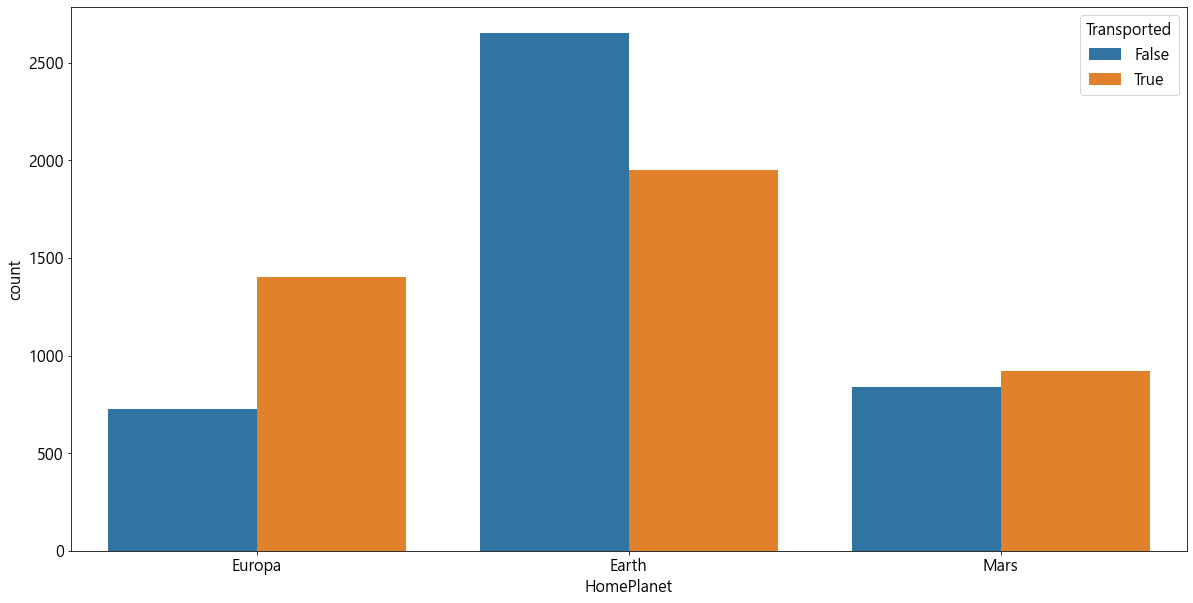

In [28]:
# 출발 행성과 도착 여부의 상관 관계를 파악한다.
sns.countplot(data=data, x='HomePlanet', hue='Transported')
plt.show()

In [29]:
# Earth는 도착하지 못한 사람들의 비율이 높고 Europa는 도착한 사람의 비율이 높기 때문에 이를 근거로 결측치를 처리한다
# (원래는 다른 컬럼들까지도 다 살펴봐야 합니다.)
a1 = data.query('Transported == True & HomePlanet.isna()', engine='python').index
a2 = data.query('Transported == False & HomePlanet.isna()', engine='python').index

data.loc[a1, 'HomePlanet'] = 'Europa'
data.loc[a2, 'HomePlanet'] = 'Earth'

data['HomePlanet'].isnull().sum()

87

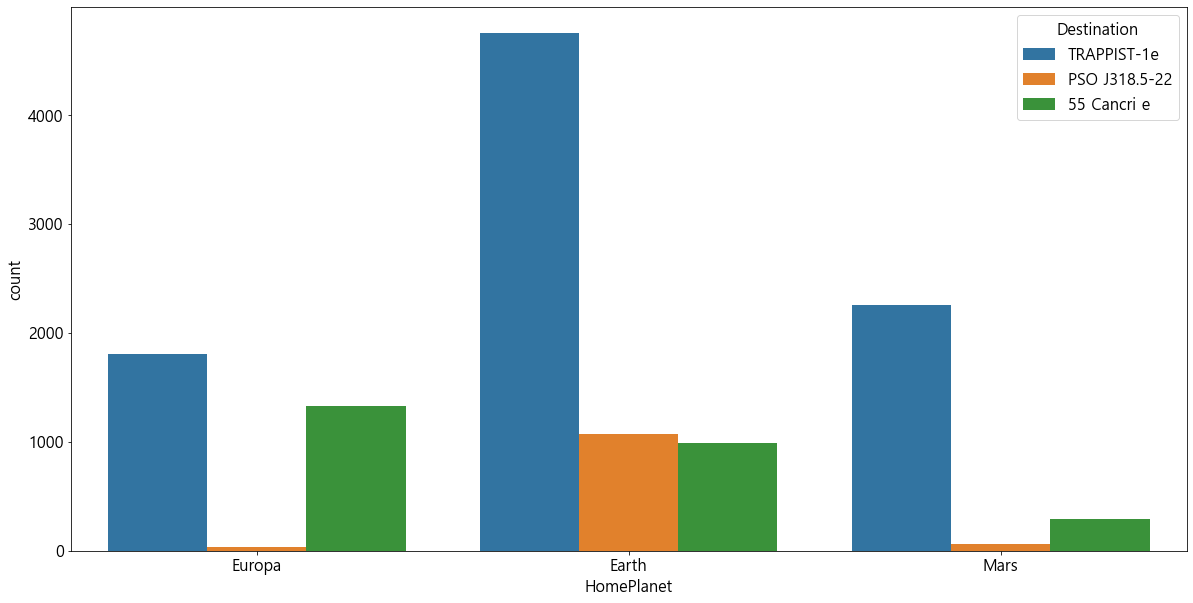

In [30]:
# HomePlanet과 Destination 간의 관계
sns.countplot(data = data, x='HomePlanet', hue='Destination')
plt.show()

In [31]:
# 남은 결측치는 Earth로 채워준다.
data['HomePlanet'].fillna('Earth', inplace=True)
data['HomePlanet'].isna().sum()

0

### CryoSleep
- 동면 여부
- True 동면, False 나다닌거..

In [32]:
# 결측치 확인
a1 = data['CryoSleep'].isna().sum()
a2 = data.shape[0]
print(f'결측치 개수 : {a1} / {a2}')
print(f'결측치 비율 : {a1 / a2 * 100}%')

결측치 개수 : 310 / 12970
결측치 비율 : 2.3901310717039324%


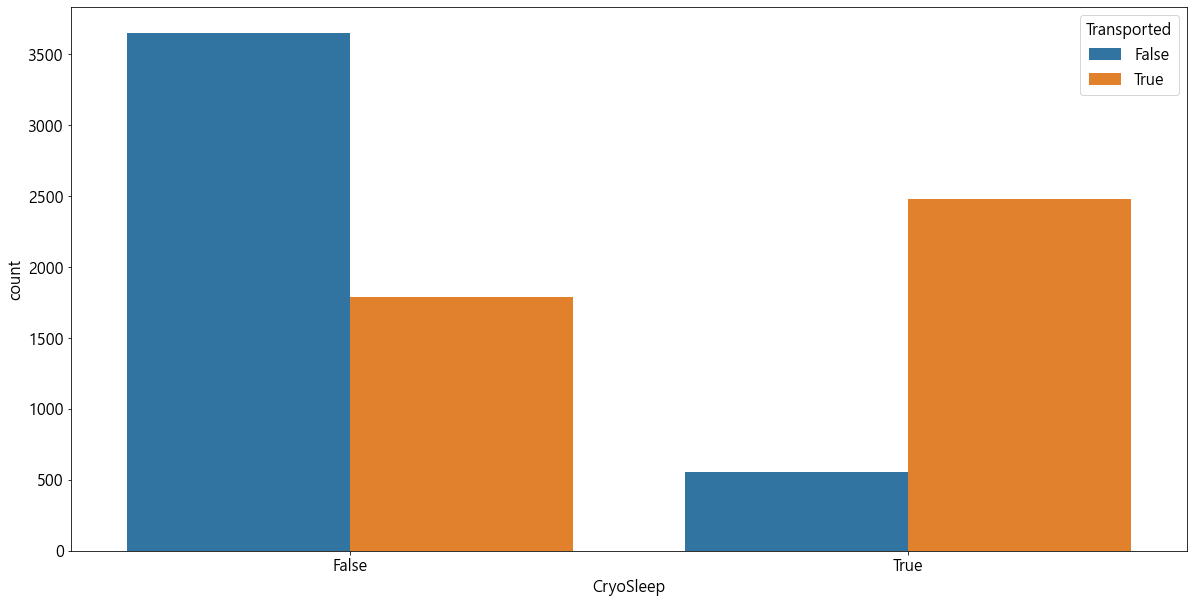

In [33]:
# 결과 데이터와의 상관 관계를 본다.
sns.countplot(data=data, x='CryoSleep', hue='Transported')
plt.show()

In [34]:
# 도착하지 못한 사람들은 False로 채워준다.
a1 = data.query('Transported == False and CryoSleep.isna()', engine='python').index
data.loc[a1, 'CryoSleep'] = False

# 도착한 사람들은 True로 채워준다.
a1 = data.query('Transported == True and CryoSleep.isna()', engine='python').index
data.loc[a1, 'CryoSleep'] = True

data['CryoSleep'].isna().sum()

93

In [35]:
# 나머지는 제일 많은 것으로 채워주겠습니다.
display(data['CryoSleep'].value_counts())
data['CryoSleep'].fillna(False, inplace=True)
data['CryoSleep'].isnull().sum()

False    8190
True     4687
Name: CryoSleep, dtype: int64

0

- 동면을 햇을 경우(True) 도착할 확률이 높다
- 동면을 하지 않았을 경우(False) 도착하지 못할 확률이 높다

### Cabin
- 좌석
- Deck/num/side 형태로 구성되어 있다.

In [36]:
# 결측치 확인
data['Cabin'].isna().sum()

299

In [37]:
# 결측치가 아닌 것만 가져온다.
data2 = data.query('Cabin.notna()', engine='python')
data2['Cabin'].isna().sum()

0

In [38]:
# 원본 데이터 프레임에 컬럼을 추가
data['Deck'] = np.nan
data['SeatNum'] = np.nan
data['Side'] = np.nan
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupNum,Deck,SeatNum,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,NaN,NaN,NaN
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,NaN,NaN,NaN
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,NaN,NaN,NaN
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,NaN,NaN,NaN
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,9266,2,NaN,NaN,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,9269,1,NaN,NaN,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,9271,1,NaN,NaN,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,9273,1,NaN,NaN,NaN


In [39]:
# /를 기준으로 나눈다.
a1 = data2['Cabin'].str.split('/')
a1

0           [B, 0, P]
1           [F, 0, S]
2           [A, 0, S]
3           [A, 0, S]
4           [F, 1, S]
             ...     
12964    [F, 1796, S]
12965    [G, 1496, S]
12967     [D, 296, P]
12968     [D, 297, P]
12969    [G, 1498, S]
Name: Cabin, Length: 12671, dtype: object

In [40]:
# 각각을 담을 리스트
temp1 = []
temp2 = []
temp3 = []
for b1, b2, b3 in a1:
    temp1.append(b1)
    temp2.append(b2)
    temp3.append(b3)

In [41]:
# 원본 데이터 프레임에 넣어준다.
data.loc[data2.index, 'Deck'] = temp1
data.loc[data2.index, 'SeatNum'] = temp2
data.loc[data2.index, 'Side'] = temp3
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupNum,Deck,SeatNum,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,9266,2,G,1496,S
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,9269,1,NaN,NaN,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,9271,1,D,296,P
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,9273,1,D,297,P


In [42]:
# SeatNum를 숫자 타입으로 변환한다.
data['SeatNum'] = data['SeatNum'].astype('float64')
data['SeatNum'].dtype

dtype('float64')

In [43]:
# Deck를 기준으로 그룹을 묶고 SeatNum의 범위를 확인한다.
# Deck별로 좌석번호 범위가 다른지 확인
data[['Deck', 'SeatNum']].groupby('Deck').agg(['min','max'])

SeatNum        
         min     max
Deck                
A        0.0   109.0
B        0.0   353.0
C        0.0   342.0
D        0.0   297.0
E        0.0   608.0
F        0.0  1894.0
G        0.0  1508.0
T        0.0     4.0

- 각 deck의 좌석 번호 최소값이 같다.
- 각 deck 별 도착 여부를 확인한다.
- 각 deck 안에서 좌석 번호 범위에 따른 도착 여부 분포를 확인한다.

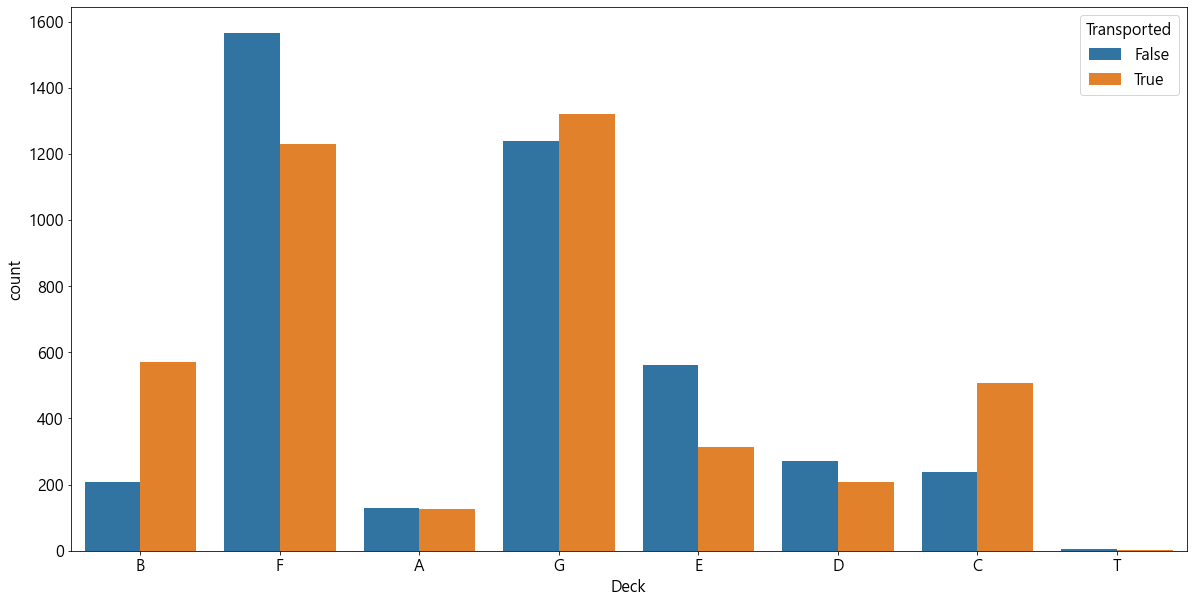

In [44]:
# count plot
sns.countplot(data=data, x='Deck', hue='Transported')
plt.show()

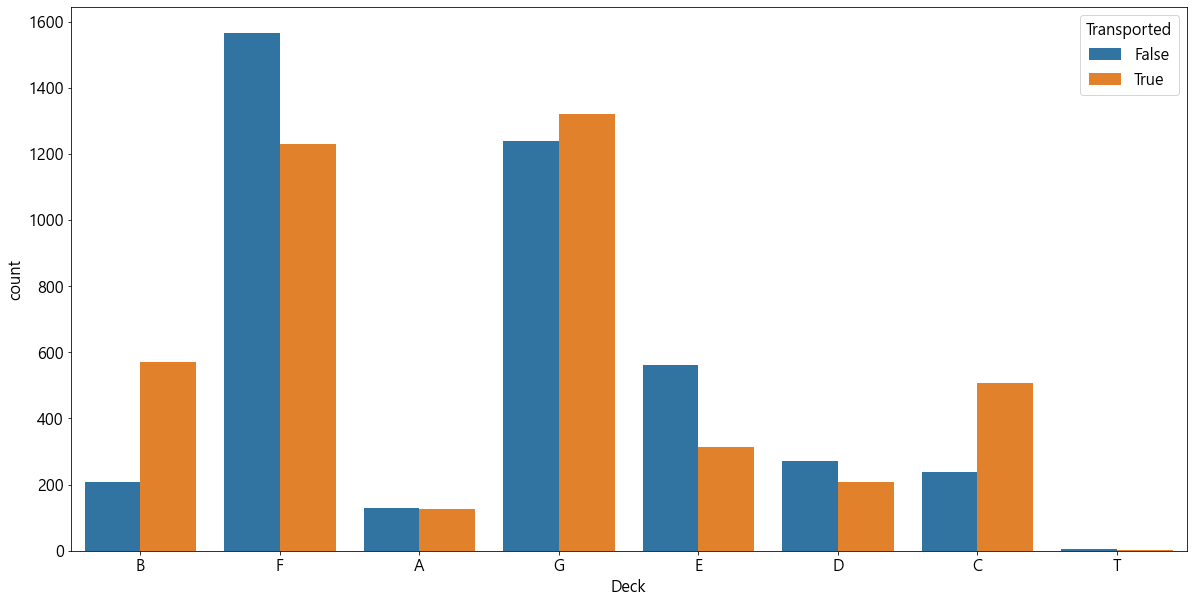

In [45]:
# count plot
sns.countplot(data=data, x='Deck', hue='Transported')
plt.show()

In [46]:
# 도착하지 못한 사람들은 Deck의 결측치를 F로 채워준다.
a1 = data.query('Transported == False and Deck.isna()',engine='python').index
data.loc[a1, 'Deck'] = 'F'

In [47]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupNum,Deck,SeatNum,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,9266,2,G,1496.0,S
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,9269,1,NaN,NaN,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,9271,1,D,296.0,P
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,9273,1,D,297.0,P


In [48]:
# 도착한 사람들 중 Deck가 결측치인 것을 가져온다.
a1= data.query('Transported == True and Deck.isna()', engine='python').index
# 인덱스를 랜덤하게 섞는다.
a2 = np.random.permutation(a1)
# 데이터의 개수를 파악한다.
a3 = len(a2)
# 절반으로 나눈 값을 구한다.
start = a3 // 2
start

50

In [49]:
# 처음부터 50 - 1 까지는 B로 채워준다.
data.loc[a2[:start], 'Deck']='B'
# 나머지는 C로 채워준다.
data.loc[a2[start:], 'Deck']='C'

data['Deck'].isna().sum()

100

In [50]:
# 나머지는 F로 채워준다. (제일 많아서...)
data['Deck'].fillna('F', inplace=True)
data['Deck'].isna().sum()

0

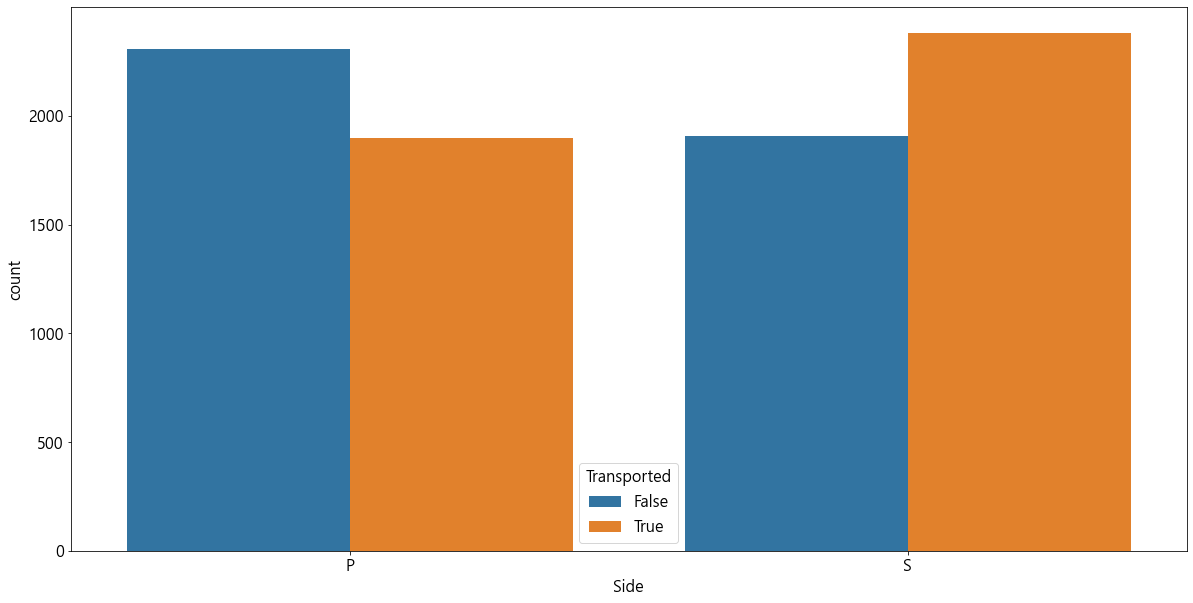

In [51]:
# Side와 결과데이터의 상관관계를 살펴본다.
sns.countplot(data=data, x='Side', hue='Transported')
plt.show()

In [52]:
# 도착한 승객은 S로 채워준다.
a1 = data.query('Transported == True and Side.isna()', engine='python').index
data.loc[a1, 'Side'] = 'S'
a2 = data.query('Transported == False and Side.isna()', engine='python').index
data.loc[a2, 'Side'] = 'P'

data['Side'].isna().sum()

100

In [53]:
# 나머지는 50:50으로 채워준다.
# Side가 결측치인 것을 가져온다.
a1 = data.query('Side.isna()', engine='python').index
# 랜덤하게 섞어준다.
a2 = np.random.permutation(a1)
# 데이터의 개수를 구해 절반으로 나눈다.
start = len(a2) // 2
# 처음부터 절반은 S, 나머지는 P로 채워준다.
data.loc[:start, 'Side'] = 'S'
data.loc[start:, 'Side'] = 'P'

data['Side'].isna().sum()

0

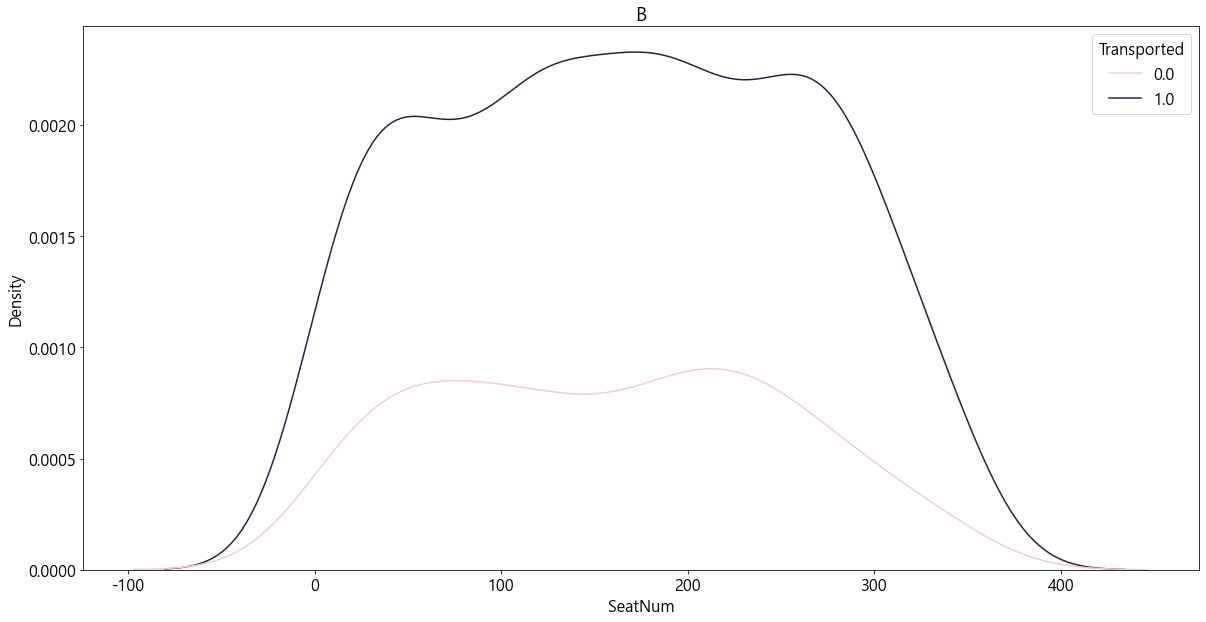

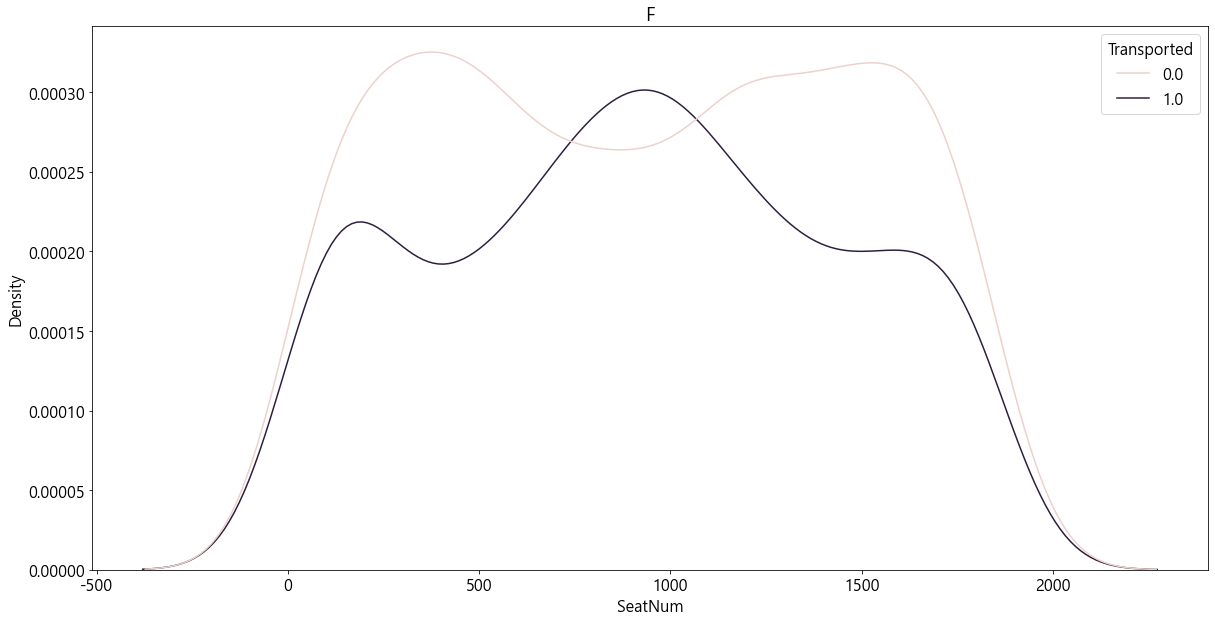

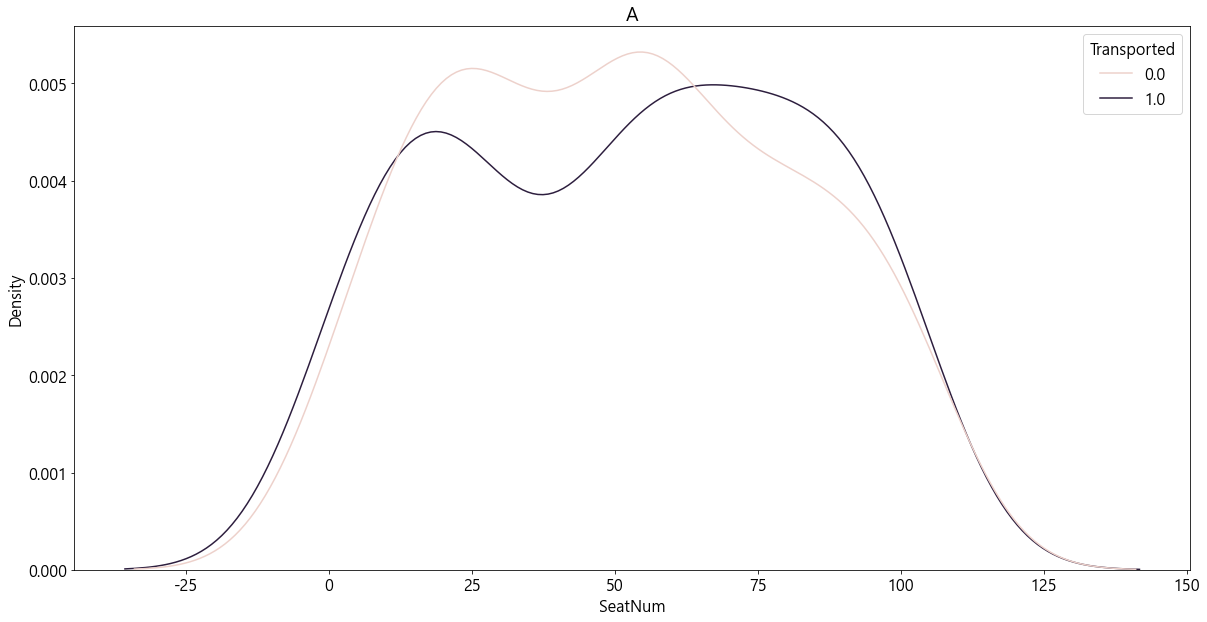

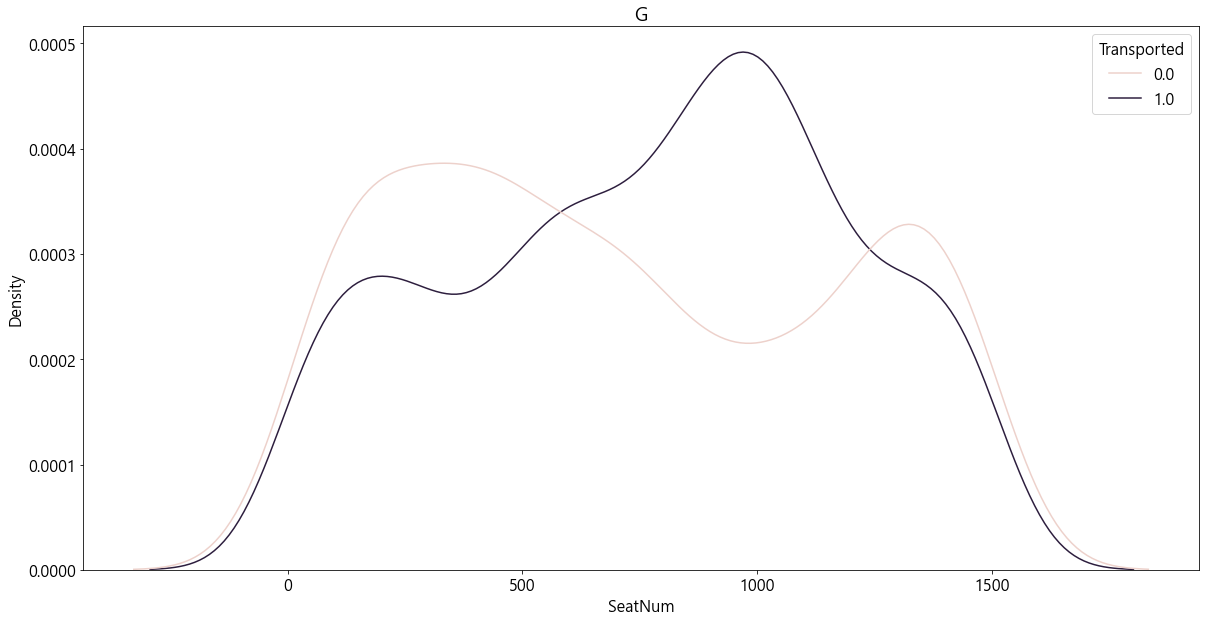

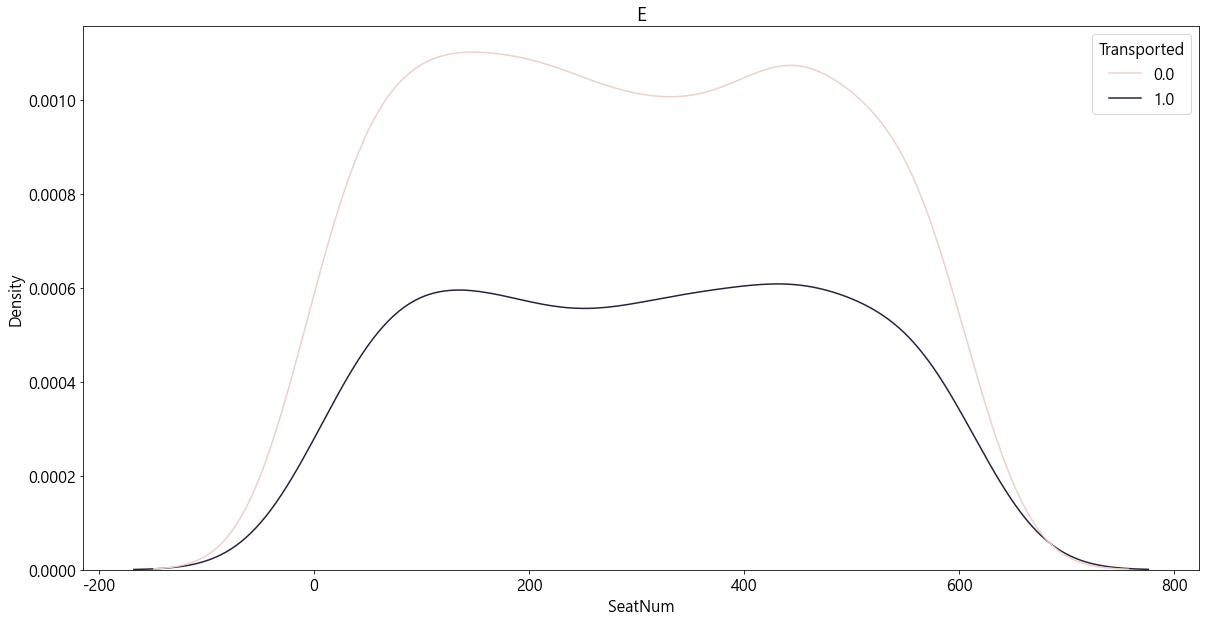

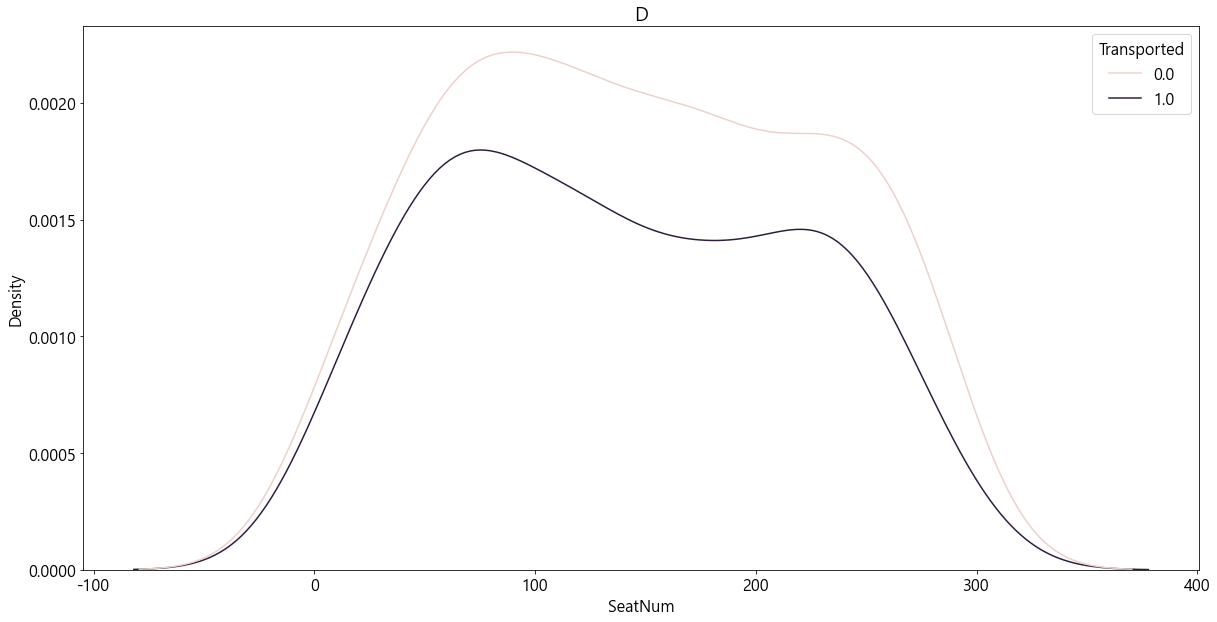

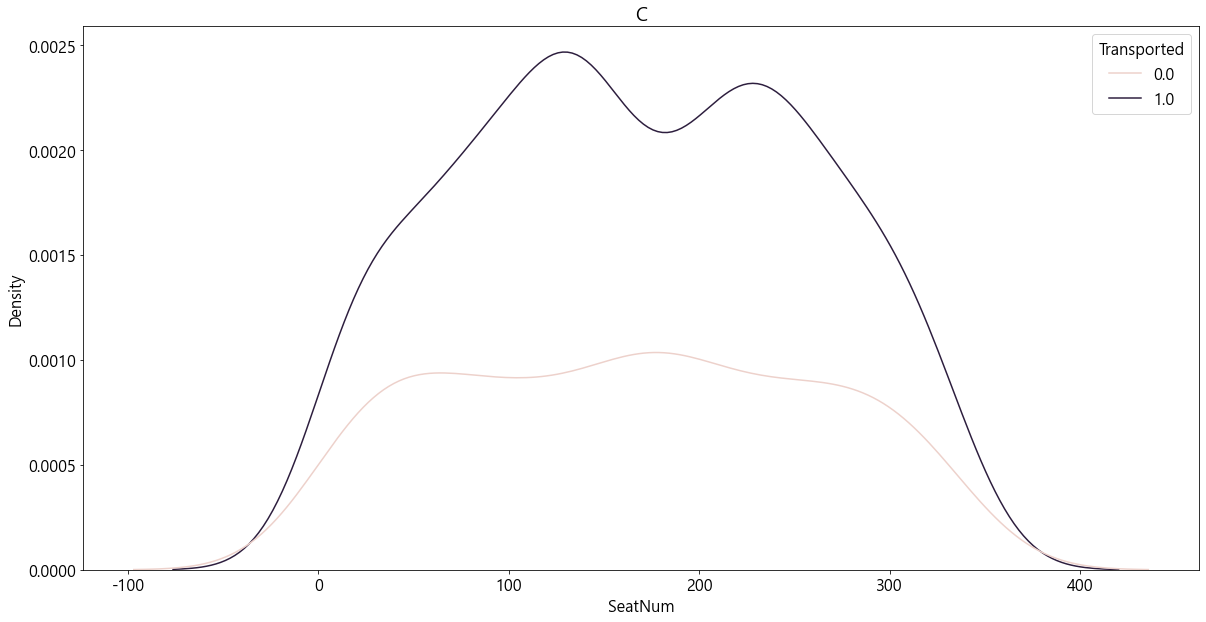

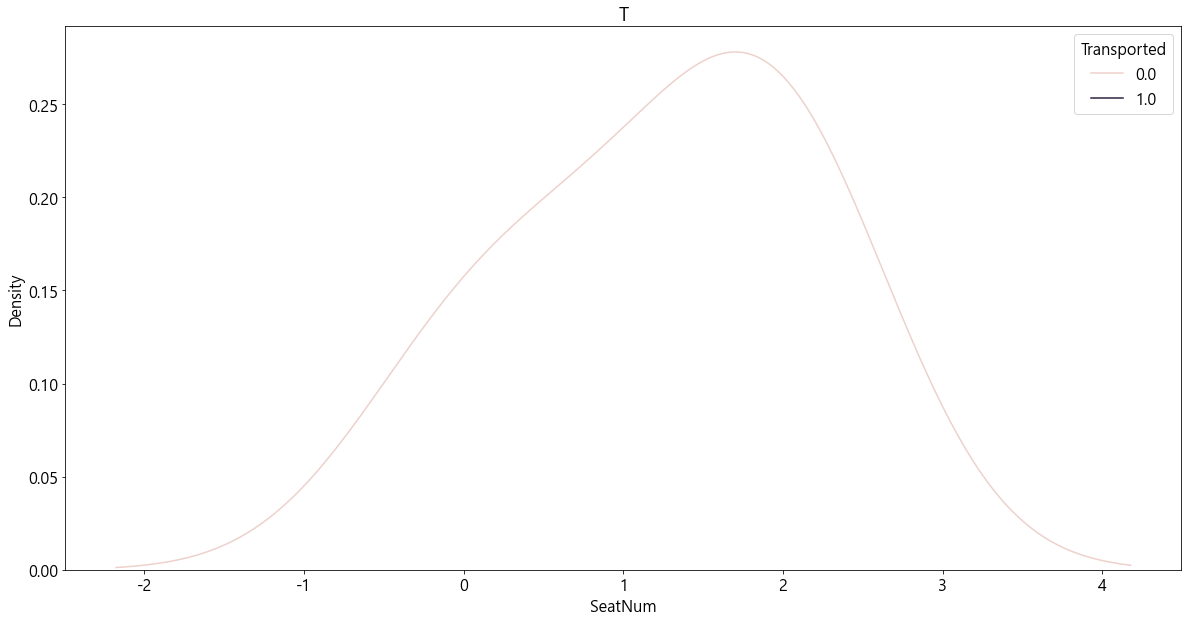

In [54]:
# 각 Deck별 SeatNum의 도착 상태를 확인한다.
# Deck를 가져온다.
a1 = data['Deck'].unique()

# Deck를 가지고도 for문 돌린다.
for a2 in a1 :
    # 현재 Deck에 해당하는 데이터를 가져온다.
    a3 = data.query('Deck == @a2')
    # 가져온 데이터의 SeatNum 별 도착 여부 그래프를 KDE를 통해 그려본다.
    sns.kdeplot(data=a3, x='SeatNum', hue='Transported')
    plt.title(a2)
    plt.show()

In [55]:
a1

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [56]:
# B Deck의 SeatNum의 중복된 것이 있는지 확인한다.
a1 = data.query('Deck == "B"')
display(len(a1))

a2 = a1['SeatNum'].unique()
display(len(a2))

1191

354

In [57]:
# 귀찮습니다..ㅋ
# 우주선의 구조가 일단 중요하다. 특정 좌석 번호는 S, P로 좌석이 구성되어 있을수도 있고 둘중 하나만 있을 수도 있다.
# 만약 둘 다 있는 좌석이라면.. S 만 있을 경우 P 중 하나를 채워주고 반대의 경우도 해줘야 한다.
# 그냥 날리겠다.

###  Destination
- 도착지 행성 이름

In [58]:
# 결측치 확인
data['Destination'].isna().sum()

274

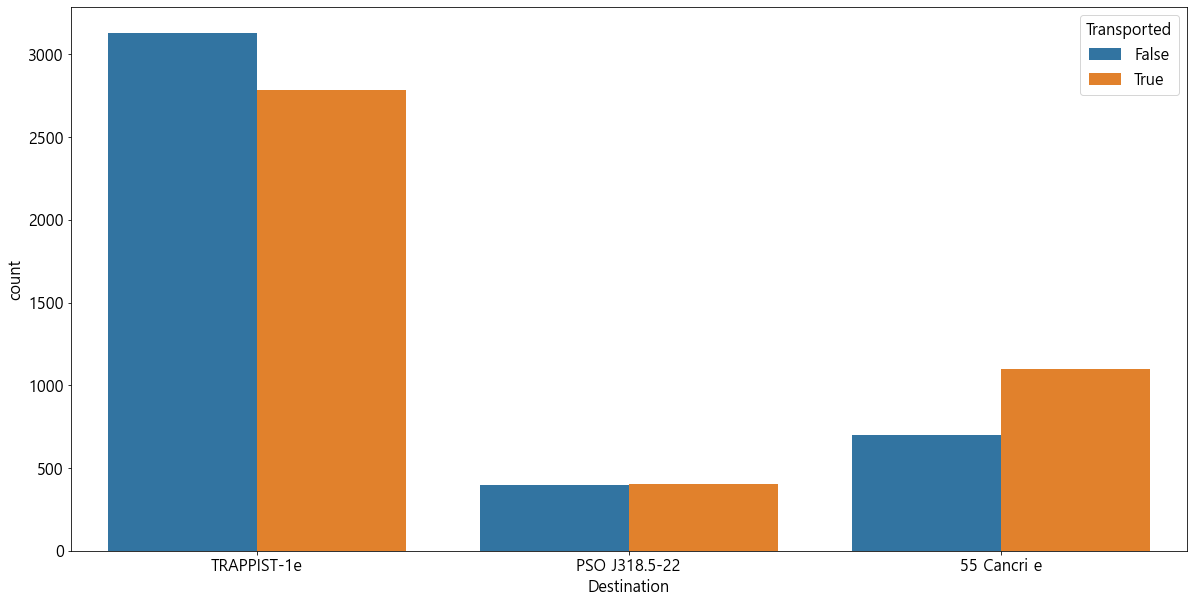

In [59]:
# 결과 데이터와의 관계를 확인한다.
sns.countplot(data=data, x='Destination', hue='Transported')
plt.show()

In [60]:
# 도착한 사람들의 결측치는 55 Cancri e로 채워준다.
a1 = data.query('Transported == True and Destination.isna()', engine='python').index
data.loc[a1, 'Destination'] = '55 Cancri e'

# 도착하지 못한 사람들의 결측치는 TRAPPIST-1e 로 채워준다.
a1 = data.query('Transported == False and Destination.isna()', engine='python').index
data.loc[a1, 'Destination'] = 'TRAPPIST-1e'

data['Destination'].isna().sum()

92

In [61]:
# 나머지는 TRAPPIST-1e로 채운다.
data['Destination'].fillna('TRAPPIST-1e', inplace=True)
data['Destination'].isna().sum()

0

### Age
- 탑승객의 나이

In [65]:
# 결측치 확인
a1 = data['Age'].isna().sum()
a2 = data.shape[0]

print(f'결측치 개수 : {a1} / {a2}')
print(f'결측치 비율 : {a1 / a2 * 100}%')

결측치 개수 : 270 / 12970
결측치 비율 : 2.081727062451812%


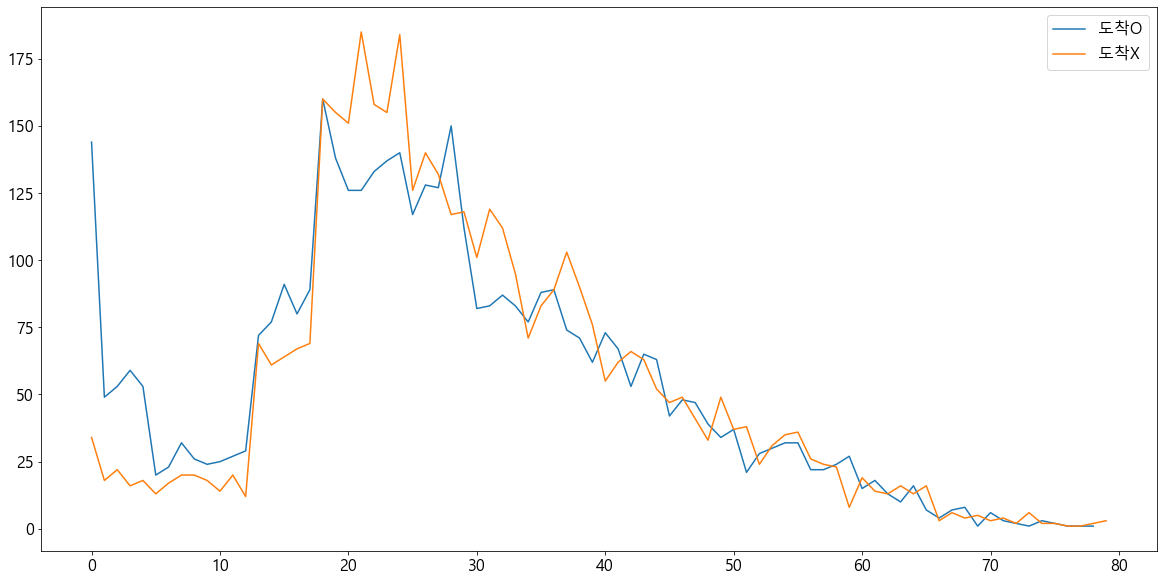

In [78]:
# matplotlib로 시각화
a1 = data.query('Transported == True')['Age']
a2 = data.query('Transported == False')['Age']

# 각 나이별로 몇 명씩있는지 값을 구한다.
a3 = a1.value_counts()
a3.sort_index(inplace=True)

a4 = a2.value_counts()
a4.sort_index(inplace=True)

# 시각화한다
plt.plot(a3, label='도착O')
plt.plot(a4, label='도착X')
plt.legend()
plt.show()

In [76]:
sns.lineplot(data=data, x='Age', hue='Transported')
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [80]:
# 도착하지 못한 사람의 나이의 결측치는 25살로 셋팅한다.
a1= data.query('Transported == False and Age.isna()', engine='python').index
data.loc[a1, 'Age'] = 25

# 도착한 사람의 결측치를 0으로 셋팅한다.
a1= data.query('Transported == True and Age.isna()', engine='python').index
data.loc[a1, 'Age'] = 0

data['Age'].isna().sum()

91

In [81]:
# 나머지 결측치는 평균으로 채워준다.
# 나이의 평균을 구한다.
a1 = data['Age'].mean()

data['Age'].fillna(a1, inplace=True)
data['Age'].isna().sum()

0

### VIP

In [82]:
# 결측치 확인
a1 = data['VIP'].isna().sum()
a2 = data.shape[0]
print(f'결측치 개수 : {a1} / {a2}')
print(f'결측치 비율 : {a1 / a2 * 100}%')     

결측치 개수 : 296 / 12970
결측치 비율 : 2.28218966846569%


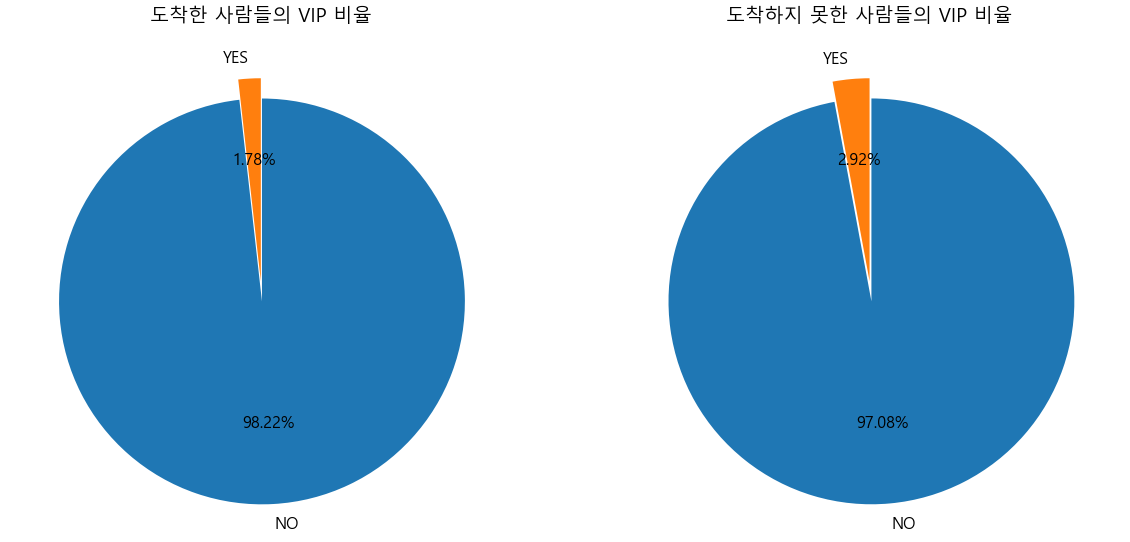

In [105]:
# VIP와 도착여부와의 상관관계를 파악한다.
a1 = data.query('Transported == True')['VIP']
a2 = data.query('Transported == False')['VIP']
# 각 값이 몇 개씩 저장되어 있는지 계산한다.
VIP_YES = a1.value_counts()
VIP_NO = a2.value_counts()
# 서브플롯
# (줄의수, 칸의수, 몇번째인가)
plt.subplot(1, 2, 1)
plt.title('도착한 사람들의 VIP 비율')
plt.pie(VIP_YES, startangle=90, # 시작각도(0이면 3시방향)
        counterclock=False, # 시작위치에서 원을 그릴 방향, 기본True 반시계방향, False 시계방향
        labels=['NO','YES'], # 각 파이의 이름
        autopct='%.2f%%', # %.2f%% 소수점 이하 둘째 자리까지 표시
        explode=[0.1,0]) # 각 파이의 돌출정도. 1=원의반지름

plt.subplot(1, 2, 2)
plt.title('도착하지 못한 사람들의 VIP 비율')
plt.pie(VIP_NO, startangle=90,
        counterclock=False,
        labels=['NO','YES'],
        autopct='%.2f%%',
        explode=[0.1,0])
plt.show()

- VIP 컬럼은 도착한 승객과 도착하지 않은 승객이 비율이 비슷하다.
- 따라서 제거한다.

### RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
- 그냥 평균 구해서 채우겠습니다.
- 꼭 상관관계 분석해서 해보시기 바랍니다.

In [108]:
# 각 평균을 구한다.
a1 = data['RoomService'].mean()
a2 = data['FoodCourt'].mean()
a3 = data['ShoppingMall'].mean()
a4 = data['Spa'].mean()
a5 = data['VRDeck'].mean()


In [109]:
# 결측치를 채운다.
data['RoomService'].fillna(a1, inplace=True)
data['FoodCourt'].fillna(a2, inplace=True)
data['ShoppingMall'].fillna(a3, inplace=True)
data['Spa'].fillna(a4, inplace=True)
data['VRDeck'].fillna(a5, inplace=True)

In [110]:
data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination        0
Age                0
VIP              296
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
Group              0
GroupNum           0
Deck               0
SeatNum          299
Side               0
dtype: int64

### 전처리가 끝난 데이터 저장

In [112]:
# 불필요한 컬럼 삭제
# PassengerId : 모든 승객이 값이 다 다르다. Group, GroupNum을 발생 시켰다. 허나, 나중에 결과를 만들기 위해 남겨둔다.
# Cabin : 모든 승객이 값이 다 다르다. 이 데이터를 가지고 Deck와 Side를 발생시켰고 그것을 사용하도록 한다.
# VIP : 도착 유뮤에 대한 비율이 비슷했고 VIP인 사람들의 수가 너무 적기 때문에 사용하지 않는다.
# Name : 사람의 이름은 도착유무에 관계가 없다고 판단해서 제거한다.
# SeatNum : Cabin을 통해 발생시킨 파생변수로써 결측치를 채우는 것이 애매하기 때문에 재거한다.
a1 = ['Cabin', 'VIP', 'Name', 'SeatNum']
data.drop(a1, axis=1, inplace=True)
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,GroupNum,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.00000,0.0,0.0,0.0,0.0,0.0,False,0001,1,B,S
1,0002_01,Earth,False,TRAPPIST-1e,24.00000,109.0,9.0,25.0,549.0,44.0,True,0002,1,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.00000,43.0,3576.0,0.0,6715.0,49.0,False,0003,2,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.00000,0.0,1283.0,371.0,3329.0,193.0,False,0003,2,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.00000,303.0,70.0,151.0,565.0,2.0,True,0004,1,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,TRAPPIST-1e,34.00000,0.0,0.0,0.0,0.0,0.0,NaN,9266,2,G,P
12966,9269_01,Earth,False,TRAPPIST-1e,42.00000,0.0,847.0,17.0,10.0,144.0,NaN,9269,1,F,P
12967,9271_01,Mars,True,55 Cancri e,28.54484,0.0,0.0,0.0,0.0,0.0,NaN,9271,1,D,P
12968,9273_01,Europa,False,TRAPPIST-1e,28.54484,0.0,2680.0,0.0,0.0,523.0,NaN,9273,1,D,P


In [113]:
# 결측치 확인
data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
Group              0
GroupNum           0
Deck               0
Side               0
dtype: int64

In [114]:
# 학습용과 예측용으로 나눈다.
a1 = data.query('Transported.notna()', engine='python')
a2 = data.query('Transported.isna()', engine='python')

In [119]:
a1.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Group           0
GroupNum        0
Deck            0
Side            0
dtype: int64

In [117]:
# 예측할 데이터에 대한 결측치 확인
a2.drop('Transported', axis=1, inplace=True)
a2.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
GroupNum        0
Deck            0
Side            0
dtype: int64

In [120]:
# 저장
a1.to_csv('./data/train2.csv', index=None)
a2.to_csv('./data/test2.csv', index=None)